## LGD Modeling

In [1]:
# Import Required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Sample Dataset
df = pd.read_csv("for_lgd.csv")

In [3]:
pd.options.display.max_columns=None

from IPython.display import display

In [4]:
df.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,months_since_earliest_cr_line,term: 60 months,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,title:credit_card,title:home_loan,title:other,title:personal_loan,initial_list_status:w,good_bad,recoveries,funded_amnt,total_rec_prncp
0,0,0.670035,0.664825,0.262638,1.497150,1.006444,1.059905,1.304113,0.356377,0.000000,0.773668,0.712382,0.719301,0.992601,1.617429,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1,0.00,5000,5000.00
1,1,0.389775,1.130154,0.438601,0.089404,1.699817,0.332115,0.141099,0.000000,0.000000,0.145068,0.487113,0.612518,0.992601,0.974771,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,117.08,2500,456.46
2,2,0.375475,1.193440,0.000000,0.591694,1.349571,0.489996,1.539369,0.414847,0.000000,0.502414,0.591546,1.089615,0.992601,0.804442,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1,0.00,2400,2400.00
3,3,1.035422,0.960176,0.817115,1.158212,1.006444,0.700464,0.319250,1.382352,0.000000,1.128200,1.074686,0.928010,0.992601,1.154036,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1,0.00,10000,10000.00
4,4,0.456446,0.880266,1.174037,1.061977,0.000000,1.413385,0.833045,1.407439,1.307979,0.531213,0.768992,0.438723,0.992601,1.158387,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,0.00,3000,2233.10


In [5]:
df.shape

(466285, 51)

# To Find Number of Goods and Bad.
For Analytical purpose Goods have been denoted by 1 and bads have been denoted by 0

In [6]:
df['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [7]:
df['good_bad'] = np.where(df['good_bad'] == 1, 0, 1)

In [8]:
df['good_bad'].value_counts()

0    415317
1     50968
Name: good_bad, dtype: int64

In [9]:
df1 = df.loc[df['good_bad'] == 1]

In [10]:
df1.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,tot_cur_bal,months_since_earliest_cr_line,term: 60 months,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Source Verified,verification_status:Verified,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,title:credit_card,title:home_loan,title:other,title:personal_loan,initial_list_status:w,good_bad,recoveries,funded_amnt,total_rec_prncp
1,1,0.389775,1.130154,0.438601,0.089404,1.699817,0.332115,0.141099,0.000000,0.0,0.145068,0.487113,0.612518,0.992601,0.974771,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1,117.08,2500,456.46
8,8,0.723350,1.642237,0.660634,0.406240,1.349571,0.674990,0.499346,0.571779,0.0,0.024575,0.371065,0.684419,0.992601,0.619420,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,189.06,5600,162.02
9,9,0.703790,0.880266,0.000000,1.068597,0.000000,0.893921,0.560195,0.000000,0.0,0.259046,0.551320,0.616969,0.992601,0.584472,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1,269.29,5375,673.48
12,12,0.973449,0.960176,0.438601,0.666416,1.006444,0.943350,1.431187,0.356377,0.0,0.401476,0.572924,0.884174,0.992601,0.619420,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,444.30,9000,1256.14
14,14,1.035422,0.664825,1.333043,0.496843,1.349571,1.002558,0.858229,1.164204,0.0,0.883756,0.889493,0.902198,0.992601,1.377900,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1,645.10,10000,5433.47


In [11]:
df1.columns

Index(['Unnamed: 0', 'loan_amnt', 'int_rate', 'annual_inc', 'dti',
       'inq_last_6mths', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal',
       'months_since_earliest_cr_line', 'term: 60 months', 'grade:B',
       'grade:C', 'grade:D', 'grade:E', 'grade:F', 'grade:G',
       'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Source Verified', 'verification_status:Verified',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'title:credit_card',
       'title:home_loan', 'title:other', 'title:personal_loan',
       'initial_list_stat

In [12]:
# recovery calculation
df1['recoveries'] = (df1['funded_amnt'] - df1['recoveries']) / df1['funded_amnt']

In [15]:
df1['recoveries'].describe()

count    50968.000000
mean         0.948449
std          0.085001
min          0.000000
25%          0.898227
50%          1.000000
75%          1.000000
max          1.000000
Name: recoveries, dtype: float64

In [14]:
# Restricting recovery to have value greater than 0
df1['recoveries'] = np.where(df1['recoveries'] < 0, 0, df1['recoveries'])

# Step 1. Logistic Regression.
Aim is to first model using Binary Logistic Regression, to find account which has recovery Greater than 0 will be represented by 1 and rest will be 0. 

In [16]:
# Data preparation, assigning 1 for all those where recovery is greater than 0 will be assigned 1 and rest will be 0.
df1['recoveries_0_1'] = np.where(df1['recoveries'] == 0, 0, 1)

In [19]:
df1['recoveries'].head()

1     0.953168
8     0.966239
9     0.949900
12    0.950633
14    0.935490
Name: recoveries, dtype: float64

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
# train test data preparation
xtrain, xtest, ytrain, ytest = train_test_split(df1.drop(['good_bad','recoveries_0_1'], axis = 1), df1['recoveries_0_1'], test_size = 0.25, random_state = 0)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((38226, 50), (12742, 50), (38226,), (12742,))

In [27]:
reg = LogisticRegression()

In [28]:
# Model Fitting
reg.fit(xtrain, ytrain)

LogisticRegression()

In [29]:
reg.intercept_

array([0.54413726])

In [30]:
reg.coef_

array([[-1.89715412e-06,  7.46684654e-02,  3.83667516e-01,
        -2.65349010e-01,  9.95338708e-01,  9.52904726e-02,
         2.97402055e-01,  5.85957668e-01,  9.07366333e-01,
         8.38375310e-02, -2.20819138e+00,  1.69958042e-01,
         1.52305787e-01,  1.54200805e-01,  1.02427737e-01,
        -6.58976477e-01,  3.61754889e-01,  1.30404308e+00,
         2.44913177e-01,  1.53619624e-02, -4.55312097e-01,
        -3.32562513e-01,  1.10843379e+00, -2.63831772e-01,
         1.29004369e-02,  1.30859686e-01,  7.94779718e-03,
         1.78033291e-01, -9.35069620e-02,  2.04058515e-01,
         7.55408215e-01,  8.22979554e-02,  1.98333040e-01,
         7.49808926e-02,  3.02153214e-01, -2.95066383e-01,
        -3.82698051e-01, -1.13382028e-01,  2.55825305e-02,
         4.16581418e-02,  1.24684474e-01, -1.30485554e-01,
         3.95056695e-01,  3.83295835e-01, -5.05042063e-01,
         9.84207438e-02, -1.34281981e-01,  3.21690993e+00,
         2.87444567e-05,  1.28545707e-03]])

In [31]:
feature_name = xtrain.columns.values

In [32]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

In [33]:
#Model Parameters
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] # Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index() # Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,0.544137
1,Unnamed: 0,-0.000002
2,loan_amnt,0.074668
3,int_rate,0.383668
4,annual_inc,-0.265349
5,dti,0.995339
6,inq_last_6mths,0.095290
7,revol_bal,0.297402
8,revol_util,0.585958
9,total_acc,0.907366


In [34]:
y_hat_test = reg.predict_proba(xtest)

In [35]:
y_hat_test = y_hat_test[:][:,1]

In [36]:
ytest.reset_index(drop = True, inplace = True)
ytest.head()

0    1
1    1
2    1
3    1
4    1
Name: recoveries_0_1, dtype: int32

In [37]:
df_actual_predicted_probs = pd.concat([ytest, pd.DataFrame(y_hat_test)], axis = 1)

In [38]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [39]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
0,1,0.999859
1,1,1.000000
2,1,0.999962
3,1,1.000000
4,1,0.998413


In [66]:
# Setting threshold for better result, selecting higher threshold as majority of data is inclined towards valure of recovery = 1
tr = 0.99
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [67]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7,1
1,77,12657


In [68]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000549,0.000078
1,0.006043,0.993329


In [70]:
df2 = df1.loc[df1['recoveries_0_1'] == 1]

In [71]:
df2.shape

(50937, 52)

In [72]:
df2['recoveries'].head()

1     0.953168
8     0.966239
9     0.949900
12    0.950633
14    0.935490
Name: recoveries, dtype: float64

# Step 2. Using Linear Regression
Modeling those accounts only where recovery is greater than 0 . Using linear regression, aim is to model recovery value.

In [73]:
xtrain, xtest, ytrain, ytest = train_test_split(df2.drop(['good_bad','recoveries_0_1'], axis = 1), df2['recoveries'], test_size = 0.25, random_state = 0)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
reg_lgd = LinearRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg_lgd.fit(xtrain, ytrain)

LinearRegression()

In [79]:
feature_name = xtrain.columns.values

In [80]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

In [82]:
reg_lgd.intercept_

-2.1449508835758024e-13

In [83]:
summary_table['Coefficients'] = np.transpose(reg_lgd.coef_)
summary_table.index = summary_table.index + 1 # Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd.intercept_] # Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index() # Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-2.144951e-13
2,Unnamed: 0,1.208309e-20
3,loan_amnt,3.899279e-14
4,int_rate,1.127919e-14
5,annual_inc,-5.467155e-14
6,dti,-2.380388e-14
7,inq_last_6mths,8.774231e-15
8,revol_bal,8.486267e-15
9,revol_util,1.922074e-15
10,total_acc,-8.663209e-15


In [84]:
y_hat_test_lgd_stage_2 = reg_lgd.predict(xtest)

In [85]:
lgd_targets_stage_2_test_temp = ytest

In [86]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test_temp.reset_index(drop = True)

In [87]:
pd.concat([lgd_targets_stage_2_test_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis = 1).corr()

,recoveries,0
recoveries,1.0,1.0
0,1.0,1.0


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<AxesSubplot:xlabel='recoveries', ylabel='Density'>

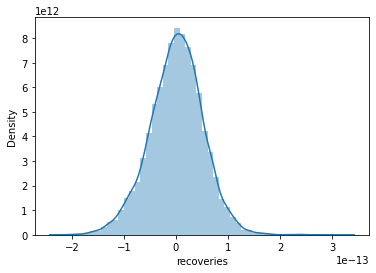

In [92]:
sns.distplot(ytest - y_hat_test_lgd_stage_2)

In [95]:
y_hat_test_lgd_stage_2_all = reg_lgd.predict(xtest)

In [96]:
y_hat_test_lgd_stage_2_all

array([0.8435   , 1.       , 0.8833408, ..., 1.       , 1.       ,
       1.       ])

In [104]:
y_hat_test_lgd_stage_1 = df_actual_predicted_probs['y_hat_test'].head(12735)

In [105]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [107]:
y_hat_test_lgd.describe()

count    12735.000000
mean         0.942716
std          0.112212
min          0.000000
25%          0.895784
50%          1.000000
75%          1.000000
max          1.000000
Name: y_hat_test, dtype: float64

<AxesSubplot:xlabel='y_hat_test', ylabel='Density'>

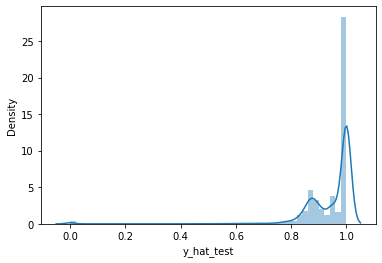

In [108]:
sns.distplot(y_hat_test_lgd)